## REGRESSION PROBLEM
Predict the number of product sold using advertisement expenses on different media
------------

### Import the required Libraries
---

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, t
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Import the data set
---

In [2]:
import pandas as pd

df_adv = pd.read_csv(r"C:\Users\bahad\Desktop\Courses\Data Analysis\Advertising_Data.csv")


In [3]:
df_adv.head(10) # checking the first 10 rows of the dataset

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0
5,507.13,612.27,230.67,142.96,171.79,965.77,7627.0
6,486.64,555.02,203.26,271.62,70.04,366.25,5177.0
7,762.09,184.57,176.61,97.85,116.67,251.74,3726.0
8,638.60,778.31,796.32,759.04,857.13,515.16,9801.0
9,591.48,542.51,400.23,329.15,577.38,931.65,8652.0


In [4]:
df_adv.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


#### We get an idea about the data in each column like 'Product_Sold' column has a mean: 7031 and the maximum and minimum value :2259 and 12227 respectively. Similarly the '50%' row represents the median of each column and so on..

### Looking for dataset containing any null values.
---

In [5]:
print(df_adv.isnull().sum())

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64


#### We see that we do not have any null values in any columns.

### Visualising the relationship between advertising expenses on different sources
---

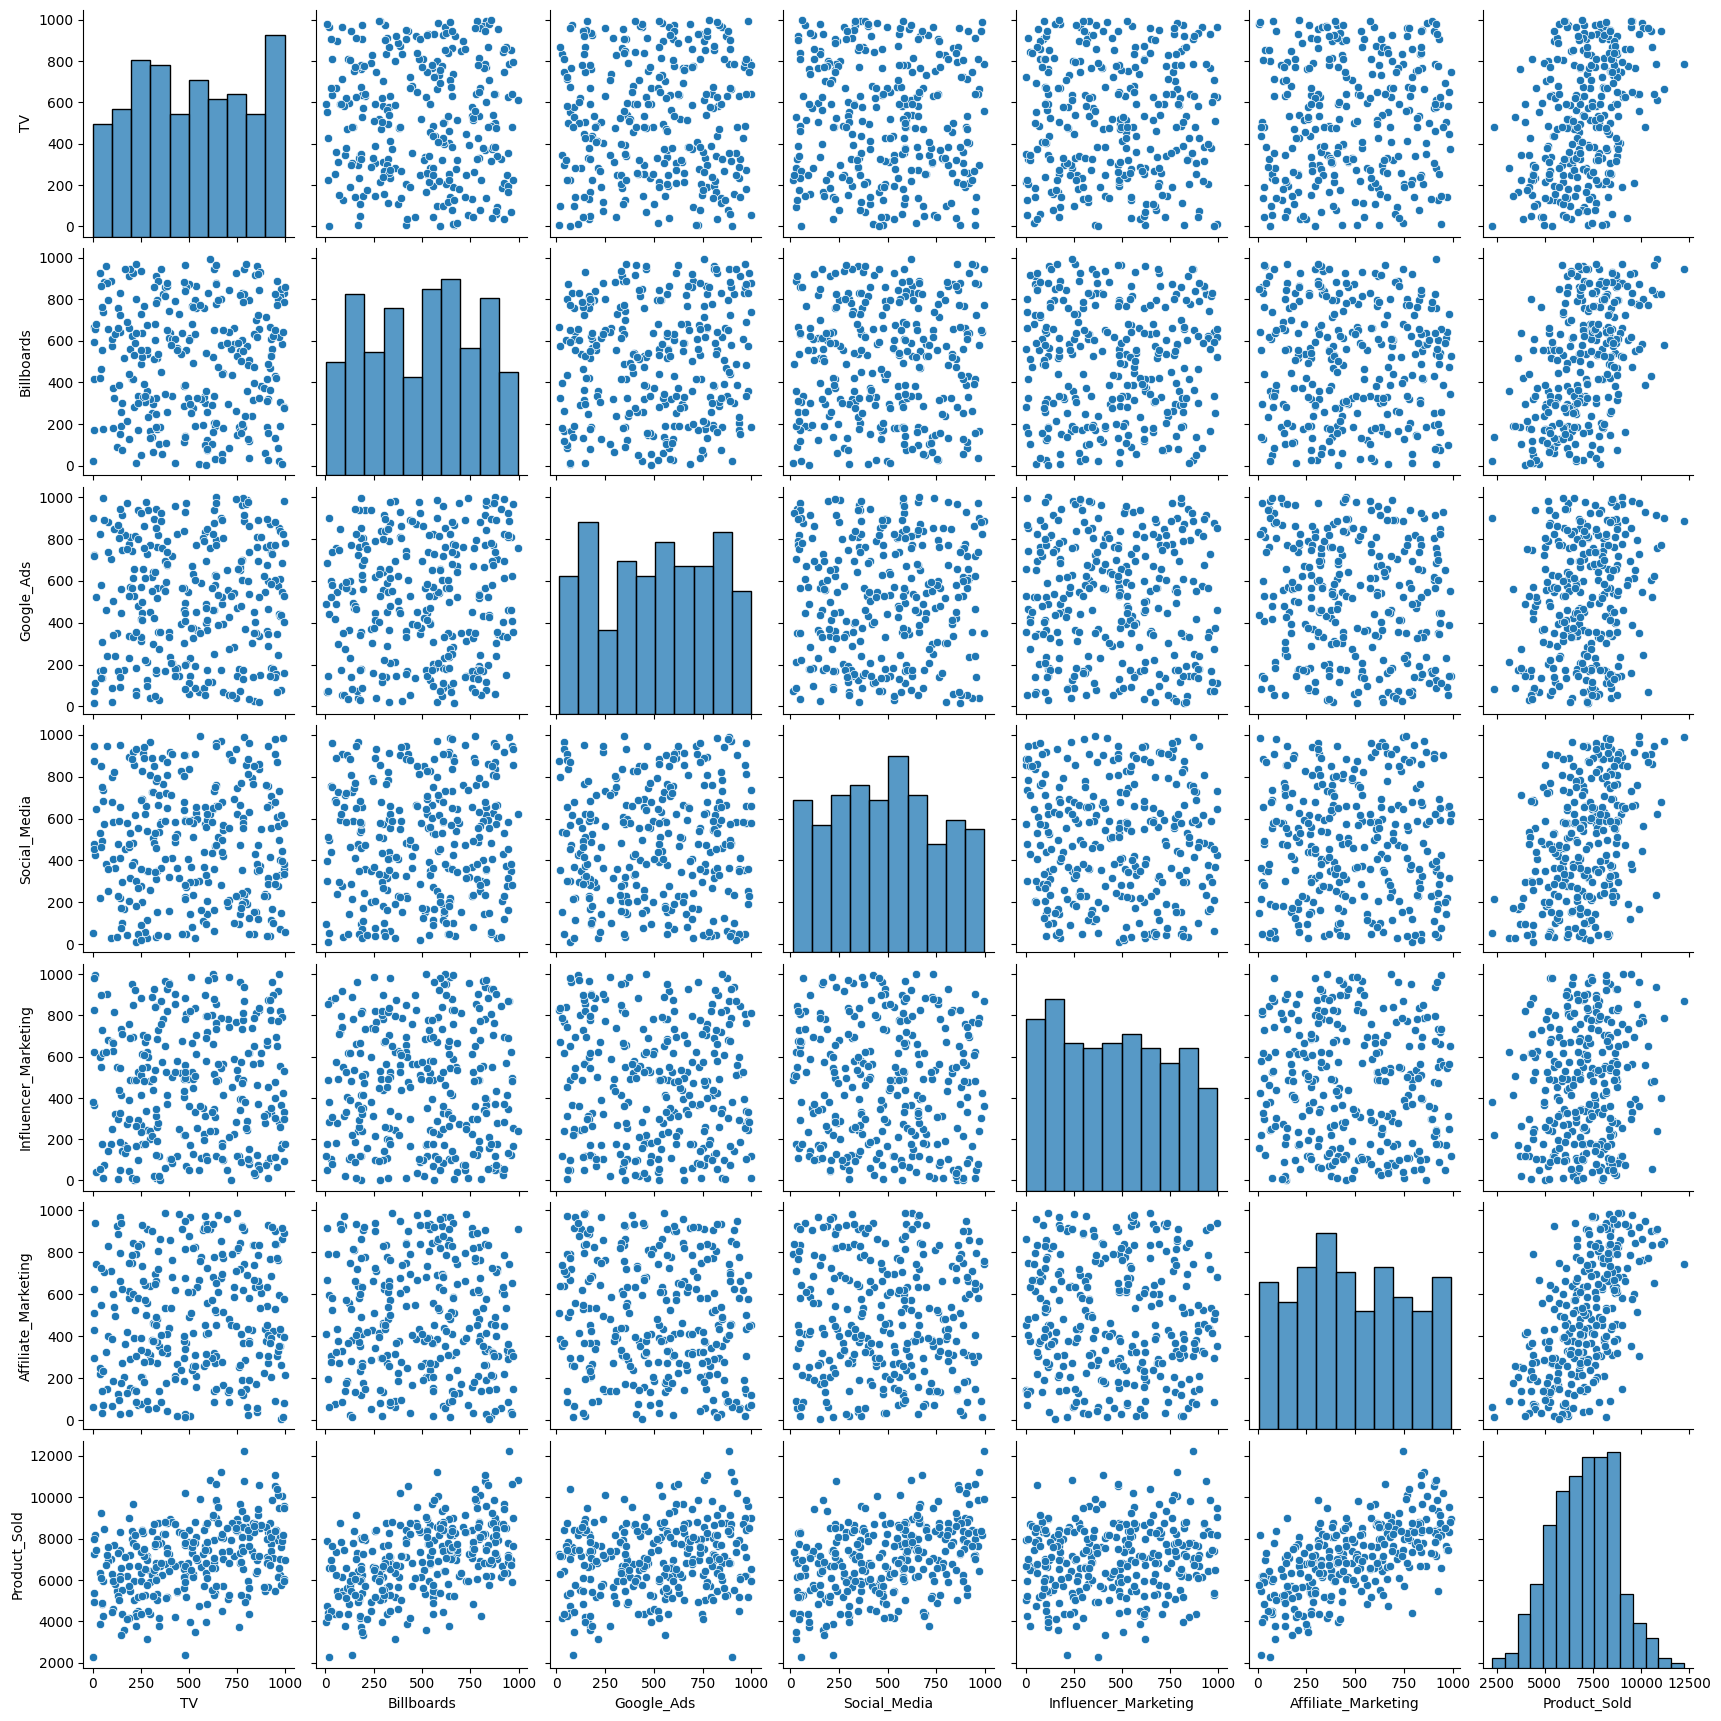

In [6]:
sns.pairplot(data= df_adv)
plt.show()

### Correlation Matrix
---

In [7]:
# Compute the correlation matrix
correlation_matrix = df_adv.corr()
print(correlation_matrix)

                            TV  Billboards  Google_Ads  Social_Media  \
TV                    1.000000   -0.028851    0.025265     -0.038993   
Billboards           -0.028851    1.000000    0.052991      0.048722   
Google_Ads            0.025265    0.052991    1.000000      0.040265   
Social_Media         -0.038993    0.048722    0.040265      1.000000   
Influencer_Marketing  0.009970   -0.005815   -0.059243     -0.042679   
Affiliate_Marketing   0.087524   -0.041060   -0.131834     -0.019522   
Product_Sold          0.374228    0.480593    0.203678      0.401088   

                      Influencer_Marketing  Affiliate_Marketing  Product_Sold  
TV                                0.009970             0.087524      0.374228  
Billboards                       -0.005815            -0.041060      0.480593  
Google_Ads                       -0.059243            -0.131834      0.203678  
Social_Media                     -0.042679            -0.019522      0.401088  
Influencer_Marketing   

#### While TV, Billboards, Social Media and Affiliate Marketing is having a good positive correlation.
#### Google_Ads and Influencer_Marketing although positively correlated are having a very low correlation co-efficient :

#### Google_Ads : 0.203678  

#### Influencer_Marketing  : 0.140844  


### Splitting dataset into train and test sets (80:20)

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'Product_Sold' is your target and all other columns are features
X = df_adv.drop('Product_Sold', axis=1)  # Features
Y = df_adv['Product_Sold']               # Target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of Y_train : {Y_train.shape}')
print(f'Shape of Y_test : {Y_test.shape}')


Shape of X_train : (240, 6)
Shape of X_test : (60, 6)
Shape of Y_train : (240,)
Shape of Y_test : (60,)


## MODEL BUILDING

### We will predict the contribution of money spent on TV advertisement for Product sold 
---

In [9]:
# Combining data for predicting results
combined_data = pd.concat([X_train, Y_train], axis=1)

In [10]:
results = smf.ols('Product_Sold ~ TV', data=combined_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     38.74
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.17e-09
Time:                        12:38:50   Log-Likelihood:                -2107.0
No. Observations:                 240   AIC:                             4218.
Df Residuals:                     238   BIC:                             4225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5853.7126    204.899     28.569      0.000    5450.064    6257.361
TV             2.1874      0.351      6.224      0.000       1.495       2.880
==============================================================================
Omnibus:                        2.264   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.883
Skew:                           0.081   Prob(JB):                        0.390
Kurtosis:                       2.598   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We check the value of (P>|t) which is zero so we can say 'TV' is a good feature for prediction of the target variable 'Product_Sold' but the R Square value is 0.14 which is very low. So we can see adding more feature columns to improve the model. Also the B0 intercept is 5853.7126 and B1 (Intercept for the variable 'TV') is 2.1874

### Lets visualize the model when TV advertisement is only used for Product sold
---

In [11]:
x1 = combined_data['TV']
y = combined_data['Product_Sold']

Product Sold vs TV


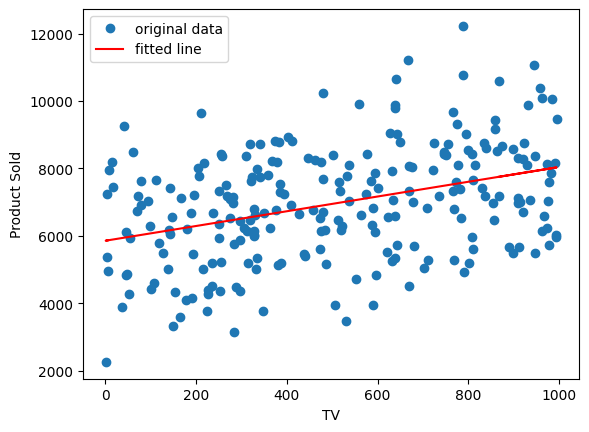

In [12]:
TVintercept = results.params.Intercept
TVslope = results.params.TV

plt.figure()
plt.plot(x1,y, 'o', label= 'original data')
plt.plot(x1, TVintercept + TVslope*x1, 'r', label='fitted line')
plt.legend()
plt.xlabel('TV')
plt.ylabel('Product Sold')
print('Product Sold vs TV')

### We will predict the contribution of money spent on Billboards advertisement for Product sold
---

In [13]:
results = smf.ols('Product_Sold ~ Billboards', data = combined_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     78.11
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.21e-16
Time:                        12:38:50   Log-Likelihood:                -2091.0
No. Observations:                 240   AIC:                             4186.
Df Residuals:                     238   BIC:                             4193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5444.6223    196.199     27.751      0.000    5058.115    5831.130
Billboards     3.0530      0.345      8.838      0.000       2.372       3.733
==============================================================================
Omnibus:                        0.347   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.491
Skew:                           0.018   Prob(JB):                        0.782
Kurtosis:                       2.781   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We check the value of (P>|t) which is zero so we can say 'BillBoard' is a good feature for prediction of the target variable 'Product_Sold' but the R Square value is 0.247 which is better than 'TV' but can be improved further. So we can further see adding more feature columns to improve the model. Also the B0 intercept is 5444.6223 and B1 (Intercept for the variable 'BillBoard') is 3.0530

### Lets visualize the model when Billboard advertisement is only used for Product sold
---

Product Sold vs Billboards


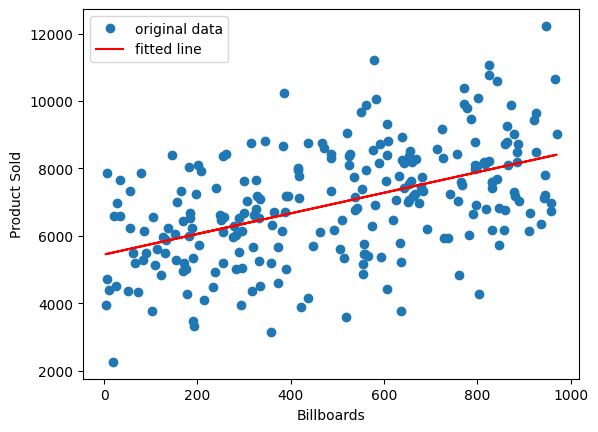

In [14]:
x2 = combined_data['Billboards']

BBintercept = results.params.Intercept
BBslope = results.params.Billboards
plt.figure()
plt.plot(x2, y, 'o', label='original data')
plt.plot(x2, BBintercept + BBslope*x2, 'r', label='fitted line')
plt.legend()
plt.xlabel('Billboards')
plt.ylabel('Product Sold')
print('Product Sold vs Billboards')

### Similarly we are checking all the features: (TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing),with respect to the target variable : Product_Sold
---

### Google Ads

In [15]:
x3 = combined_data['Google_Ads']

Sales vs Google_Ads


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     9.271
Date:                Sat, 15 Jun 2024   Prob (F-statistic):            0.00259
Time:                        12:38:50   Log-Likelihood:                -2120.5
No. Observations:                 240   AIC:                             4245.
Df Residuals:                     238   BIC:                             4252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6354.0833    226.335     28.074      0.000    5908.208    6799.959
Google_Ads     1.1561      0.380      3.045      0.003       0.408       1.904
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.358
Skew:                           0.061   Prob(JB):                        0.836
Kurtosis:                       2.856   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

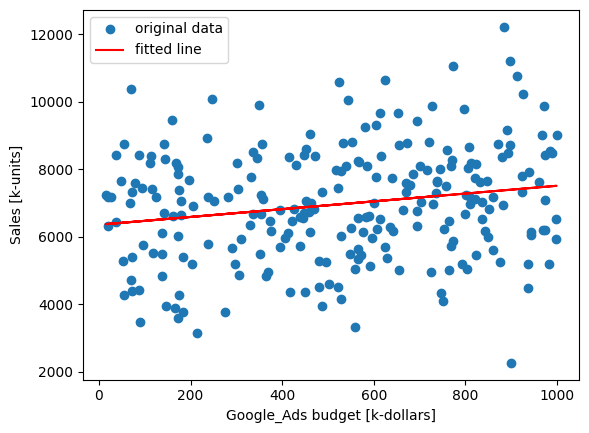

In [16]:
results = smf.ols('Product_Sold ~ Google_Ads', data=combined_data).fit()

GAds_intercept = results.params.Intercept
GAds_slope = results.params.Google_Ads

plt.figure()
plt.plot(x3, y, 'o', label='original data')
plt.plot(x3, GAds_intercept + GAds_slope*x3, 'r', label='fitted line')
plt.legend()
plt.xlabel('Google_Ads budget [k-dollars]')
plt.ylabel('Sales [k-units]')
print('Sales vs Google_Ads')

results.summary()

### Social Media

In [17]:
x4 = combined_data['Social_Media']

Sales vs Social_Media


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     45.91
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           9.62e-11
Time:                        12:38:51   Log-Likelihood:                -2103.9
No. Observations:                 240   AIC:                             4212.
Df Residuals:                     238   BIC:                             4219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5713.5580    209.672     27.250      0.000    5300.508    6126.608
Social_Media     2.4691      0.364      6.776      0.000       1.751       3.187
==============================================================================
Omnibus:                        1.018   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                1.130
Skew:                           0.130   Prob(JB):                        0.568
Kurtosis:                       2.787   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

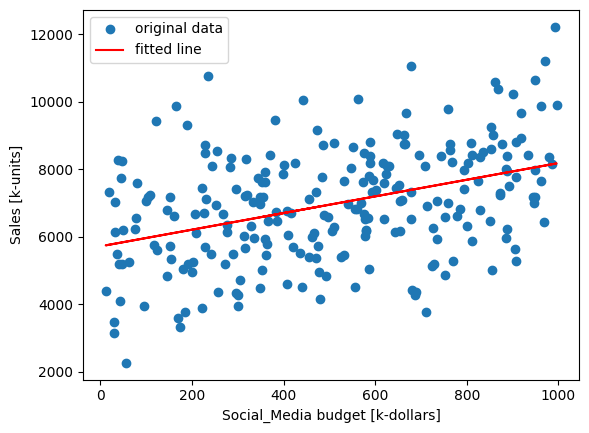

In [18]:
results = smf.ols('Product_Sold ~ Social_Media', data=combined_data).fit()


Social_Media_intercept = results.params.Intercept
Social_Media_slope = results.params.Social_Media

plt.figure()
plt.plot(x4, y, 'o', label='original data')
plt.plot(x4, Social_Media_intercept + Social_Media_slope*x4, 'r', label='fitted line')
plt.legend()
plt.xlabel('Social_Media budget [k-dollars]')
plt.ylabel('Sales [k-units]')
print('Sales vs Social_Media')

results.summary()


### Influencer Marketing

In [19]:
x5 = combined_data['Influencer_Marketing']

Sales vs Influencer_Marketing


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.300
Date:                Sat, 15 Jun 2024   Prob (F-statistic):             0.0222
Time:                        12:38:51   Log-Likelihood:                -2122.5
No. Observations:                 240   AIC:                             4249.
Df Residuals:                     238   BIC:                             4256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6550.8176    208.351     31.441      0.000    6140.369    6961.266
Influencer_Marketing     0.8681      0.377      2.302      0.022       0.125       1.611
==============================================================================
Omnibus:                        0.331   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.458
Skew:                           0.069   Prob(JB):                        0.795
Kurtosis:                       2.836   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

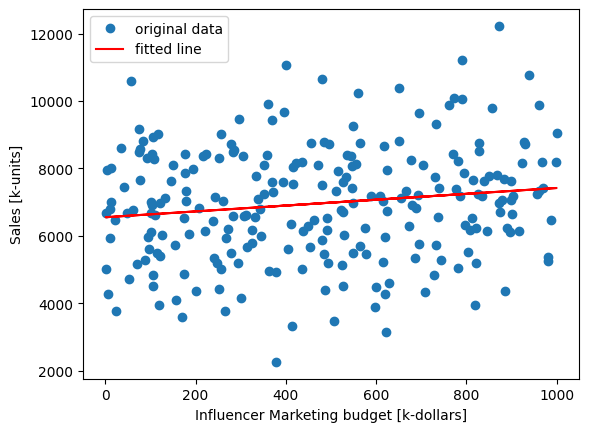

In [20]:
combined_data = pd.concat([X_train, Y_train], axis=1)
results = smf.ols('Product_Sold ~ Influencer_Marketing', data=combined_data).fit()


Infl_Marketing_intercept = results.params.Intercept
Infl_Marketing_slope = results.params.Influencer_Marketing

plt.figure()
plt.plot(x5, y, 'o', label='original data')
plt.plot(x5, Infl_Marketing_intercept + Infl_Marketing_slope*x5, 'r', label='fitted line')
plt.legend()
plt.xlabel('Influencer Marketing budget [k-dollars]')
plt.ylabel('Sales [k-units]')
print('Sales vs Influencer_Marketing')

results.summary()


### Affiliate Marketing

In [21]:
x6 = combined_data['Affiliate_Marketing']

Sales vs Affiliate_Marketing


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.34e-24
Time:                        12:38:51   Log-Likelihood:                -2072.1
No. Observations:                 240   AIC:                             4148.
Df Residuals:                     238   BIC:                             4155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5257.8021    172.381     30.501      0.000    4918.215    5597.389
Affiliate_Marketing     3.6871      0.321     11.490      0.000       3.055       4.319
==============================================================================
Omnibus:                        0.580   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.451
Skew:                           0.104   Prob(JB):                        0.798
Kurtosis:                       3.039   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

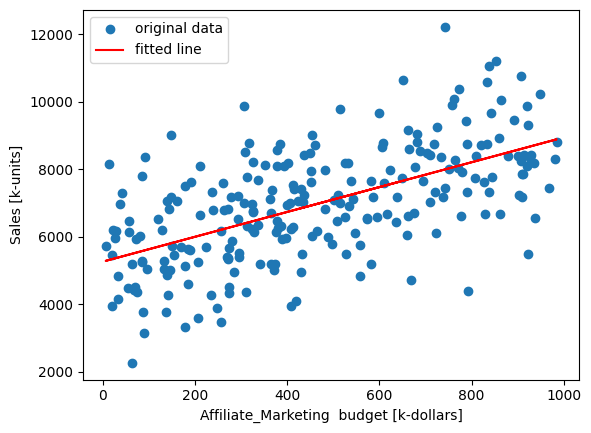

In [22]:
combined_data = pd.concat([X_train, Y_train], axis=1)
results = smf.ols('Product_Sold ~ Affiliate_Marketing', data=combined_data).fit()


Affl_Marketing_intercept = results.params.Intercept
Affl_Marketing_slope = results.params.Affiliate_Marketing

plt.figure()
plt.plot(x6, y, 'o', label='original data')
plt.plot(x6, Affl_Marketing_intercept + Affl_Marketing_slope*x6, 'r', label='fitted line')
plt.legend()
plt.xlabel('Affiliate_Marketing  budget [k-dollars]')
plt.ylabel('Sales [k-units]')
print('Sales vs Affiliate_Marketing')

results.summary()


## When training the model individually with the features one by one we see that the 3 lowest R square value was when the target 'Product_Sold' is predicted with 'Google_Ads','Influencer_Marketing' and 'TV' respectively.

## Building a model using all Features
---

In [23]:
# Fit the linear regression model using all variables
model = smf.ols('Product_Sold ~ TV + Billboards + Google_Ads + Social_Media + Influencer_Marketing + Affiliate_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.873e+05
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:38:51   Log-Likelihood:                -907.88
No. Observations:                 240   AIC:                             1830.
Df Residuals:                     233   BIC:                             1854.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3475      3.175      0.424      0.672      -4.908       7.603
TV                       2.0018      0.002    827.791      0.000       1.997       2.007
Billboards               2.9985      0.003   1179.467      0.000       2.994       3.004
Google_Ads               1.4981      0.002    600.843      0.000       1.493       1.503
Social_Media             2.4998      0.003    986.596      0.000       2.495       2.505
Influencer_Marketing     1.1997      0.002    491.486      0.000       1.195       1.204
Affiliate_Marketing      3.9966      0.003   1550.444      0.000       3.992       4.002
==============================================================================
Omnibus:                        0.184   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.912   Jarque-Bera (JB):                0.166
Skew:                           0.063   Prob(JB):                        0.921
Kurtosis:                       2.973   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## It is showing almost 100% fit. All variables together can predict the sales accurately. (This scenario can lead to overfitting of the model)

In [24]:
# copy to another variable for better readability
train_data = combined_data.copy()

## Next we started dropping each independent variable (TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing) one by one to see if we can remove any one of them.
---

### Dropping 'Google_Ads' as a feature from the model

In [25]:
# Assuming 'Product_Sold' is your target and all other columns are features
# Drop 'Google_Ads' along with 'Product_Sold' before splitting
model = smf.ols('Product_Sold ~ TV + Billboards + Social_Media + Influencer_Marketing + Affiliate_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     720.7
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          6.49e-140
Time:                        12:38:51   Log-Likelihood:                -1789.4
No. Observations:                 240   AIC:                             3591.
Df Residuals:                     234   BIC:                             3612.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              875.6651    110.869      7.898      0.000     657.236    1094.095
TV                       2.0733      0.095     21.847      0.000       1.886       2.260
Billboards               3.0879      0.100     30.966      0.000       2.891       3.284
Social_Media             2.5012      0.100     25.124      0.000       2.305       2.697
Influencer_Marketing     1.0443      0.095     10.950      0.000       0.856       1.232
Affiliate_Marketing      3.7863      0.100     37.733      0.000       3.589       3.984
==============================================================================
Omnibus:                       93.242   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.760
Skew:                          -0.099   Prob(JB):                      0.00103
Kurtosis:                       1.844   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R squared not changing significantly. Hence we can remove this in our final model.
---

### Dropping 'TV' as a feature from the model: 
---

In [26]:
# Define the predictor variables and add a constant to the model (intercept)
model = smf.ols('Product_Sold ~ Billboards + Google_Ads + Social_Media + Influencer_Marketing + Affiliate_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     357.7
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          2.10e-107
Time:                        12:38:51   Log-Likelihood:                -1866.3
No. Observations:                 240   AIC:                             3745.
Df Residuals:                     234   BIC:                             3765.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              921.0806    160.969      5.722      0.000     603.947    1238.214
Billboards               2.8651      0.137     20.864      0.000       2.595       3.136
Google_Ads               1.5997      0.135     11.869      0.000       1.334       1.865
Social_Media             2.5140      0.137     18.333      0.000       2.244       2.784
Influencer_Marketing     1.2221      0.132      9.251      0.000       0.962       1.482
Affiliate_Marketing      4.1871      0.139     30.132      0.000       3.913       4.461
==============================================================================
Omnibus:                       91.120   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.453
Skew:                           0.066   Prob(JB):                      0.00120
Kurtosis:                       1.848   Cond. No.                     4.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R squared changing significantly. Hence we cannot remove this out from final model.
---

### Dropping Billboards

In [27]:
model = smf.ols('Product_Sold ~ TV + Google_Ads + Social_Media + Influencer_Marketing + Affiliate_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.59e-71
Time:                        12:38:51   Log-Likelihood:                -1951.3
No. Observations:                 240   AIC:                             3915.
Df Residuals:                     234   BIC:                             3935.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1327.3296    228.953      5.797      0.000     876.257    1778.403
TV                       1.8210      0.186      9.785      0.000       1.454       2.188
Google_Ads               1.6701      0.192      8.701      0.000       1.292       2.048
Social_Media             2.6966      0.195     13.832      0.000       2.313       3.081
Influencer_Marketing     1.3698      0.188      7.290      0.000       1.000       1.740
Affiliate_Marketing      3.9624      0.199     19.936      0.000       3.571       4.354
==============================================================================
Omnibus:                      128.032   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.831
Skew:                          -0.061   Prob(JB):                     0.000602
Kurtosis:                       1.788   Cond. No.                     4.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R squared changing significantly. Hence we cannot remove this out from final model.
---

#### Dropping Affiliate Marketing

In [28]:
model = smf.ols('Product_Sold ~ TV + Billboards + Google_Ads + Social_Media + Influencer_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     68.52
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           6.71e-44
Time:                        12:38:51   Log-Likelihood:                -2016.9
No. Observations:                 240   AIC:                             4046.
Df Residuals:                     234   BIC:                             4067.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2206.9684    287.693      7.671      0.000    1640.168    2773.768
TV                       2.3365      0.244      9.571      0.000       1.856       2.818
Billboards               2.9542      0.258     11.465      0.000       2.447       3.462
Google_Ads               0.9730      0.250      3.886      0.000       0.480       1.466
Social_Media             2.3068      0.257      8.993      0.000       1.801       2.812
Influencer_Marketing     0.9131      0.247      3.701      0.000       0.427       1.399
==============================================================================
Omnibus:                       58.160   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.641
Skew:                           0.187   Prob(JB):                      0.00180
Kurtosis:                       1.940   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R squared changing significantly. Hence we cannot remove this out from final model.
---

### Dropping Social Media:

In [29]:
model = smf.ols('Product_Sold ~ TV + Billboards + Google_Ads + Influencer_Marketing + Affiliate_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     238.0
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.30e-89
Time:                        12:38:51   Log-Likelihood:                -1908.4
No. Observations:                 240   AIC:                             3829.
Df Residuals:                     234   BIC:                             3850.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1285.3492    186.793      6.881      0.000     917.338    1653.360
TV                       2.0180      0.156     12.937      0.000       1.711       2.325
Billboards               3.1637      0.164     19.335      0.000       2.841       3.486
Google_Ads               1.5003      0.161      9.329      0.000       1.183       1.817
Influencer_Marketing     1.0816      0.157      6.878      0.000       0.772       1.391
Affiliate_Marketing      3.8717      0.166     23.313      0.000       3.544       4.199
==============================================================================
Omnibus:                       73.841   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.390
Skew:                          -0.005   Prob(JB):                      0.00204
Kurtosis:                       1.887   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R squared changing significantly. Hence we cannot remove this out from final model.
---

### Dropping Influencer Marketing

In [30]:
model = smf.ols('Product_Sold ~ TV + Billboards + Google_Ads + Social_Media + Affiliate_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          2.67e-160
Time:                        12:38:51   Log-Likelihood:                -1741.3
No. Observations:                 240   AIC:                             3495.
Df Residuals:                     234   BIC:                             3515.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             666.7018     92.313      7.222      0.000     484.831     848.572
TV                      2.0150      0.078     25.923      0.000       1.862       2.168
Billboards              3.0724      0.082     37.661      0.000       2.912       3.233
Google_Ads              1.3682      0.080     17.168      0.000       1.211       1.525
Social_Media            2.4387      0.081     29.979      0.000       2.278       2.599
Affiliate_Marketing     3.9007      0.083     47.211      0.000       3.738       4.063
==============================================================================
Omnibus:                       96.853   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.703
Skew:                           0.064   Prob(JB):                      0.00106
Kurtosis:                       1.837   Cond. No.                     4.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R squared not changing significantly. Hence we can remove this in our final model.
---

# We can conclude that removing 'Google Ads' and 'Influencer Marketing' is affecting the R square value just by a little. So we remove those two features from the model. We saw the exact same behaviour in the correlation matrix where 'Google Ads' and 'Influencer Marketing' was related to Product_Sold very lossely. With those being in included in the model, Although the model has a R square value as 1 , but that becomes a case of Overfitting.
---

### Our Final model will be :

In [31]:
model = smf.ols('Product_Sold ~ TV + Billboards + Social_Media + Affiliate_Marketing', data=combined_data).fit()

# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Product_Sold   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     578.2
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          2.54e-120
Time:                        12:38:51   Log-Likelihood:                -1839.1
No. Observations:                 240   AIC:                             3688.
Df Residuals:                     235   BIC:                             3706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1394.7108    122.997     11.339      0.000    1152.394    1637.028
TV                      2.0795      0.116     17.856      0.000       1.850       2.309
Billboards              3.1460      0.122     25.745      0.000       2.905       3.387
Social_Media            2.4473      0.122     20.056      0.000       2.207       2.688
Affiliate_Marketing     3.7179      0.123     30.251      0.000       3.476       3.960
==============================================================================
Omnibus:                        2.498   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.900
Skew:                           0.012   Prob(JB):                        0.387
Kurtosis:                       2.565   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Predicted Model : f(x) = (2.0022 * TV) + (2.9989 * Billboards) + (2.5002 * Social_Media) + (3.9971 * Affiliate_Marketing)
---

### We see the P value for all the features are zero, so its a good model

## PREDICTION ON TEST DATA

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the values using the test dataset

Y_pred = model.predict(X_test)

# Assuming Y_pred has been predicted using your regression model and Y_test are the true values
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the R-squared value
r_squared = r2_score(Y_test, Y_pred)

# Display the evaluation results
print("\nTest Results:")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")
print(f"R-squared on Test Set: {r_squared:.4f}")


Test Results:
Mean Squared Error (MSE) on Test Set: 337810.2399
R-squared on Test Set: 0.8821


# So we see the R square of the final model as 0.8821, which is a fairly good model.